In [1]:
install.packages("ggplot2")
# Load the necessary libraries
library(ggplot2)

# Set the path to the CSV file
file_path <- "/content/crimeDC_24.csv"

# Load the dataset
crime_data <- read.csv(file_path)

# Preview the first few rows of the dataset to ensure it loaded correctly
head(crime_data)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,X,longitude,latitude,ccn,report_date,shift,method,offense,block,xblock,⋯,block_group,census_tract,voting_precinct,latitude.1,longitude.1,bid,start_date,end_date,location,offense_group
,<int>,<dbl>,<dbl>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,⋯,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>
1,0,-76.98831,38.90021,23151247,2023/09/13 16:39:06+00,DAY,OTHERS,MOTOR VEHICLE THEFT,H STREET NE AND 13TH STREET NE,401014.2,⋯,008410 1,8410,Precinct 82,38.90020,-76.98831,,2023/09/13 15:15:00+00,2023/09/13 16:38:00+00,"latitude 38.900209 latitude 38.900201 Name: 0, dtype: object,longitude -76.988311 longitude -76.988308 Name: 0, dtype: object - H STREET NE AND 13TH STREET NE",property
2,1,-76.96673,38.87637,23050047,2023/04/01 11:14:02+00,DAY,OTHERS,THEFT F/AUTO,2900 - 2943 BLOCK OF NELSON PLACE SE,402887.0,⋯,007709 1,7709,Precinct 111,38.87636,-76.96673,,2023/04/01 10:42:00+00,2023/04/01 11:00:00+00,"latitude 38.876371 latitude 38.876364 Name: 1, dtype: object,longitude -76.966731 longitude -76.966729 Name: 1, dtype: object - 2900 - 2943 BLOCK OF NELSON PLACE SE",property
3,2,-77.03196,38.90805,23022454,2023/02/10 20:12:13+00,EVENING,OTHERS,ROBBERY,1300 - 1399 BLOCK OF 14TH STREET NW,397228.0,⋯,005003 1,5003,Precinct 17,38.90804,-77.03196,,2023/02/10 18:46:00+00,2023/02/10 18:56:00+00,"latitude 38.908045 latitude 38.908037 Name: 2, dtype: object,longitude -77.031962 longitude -77.03196 Name: 2, dtype: object - 1300 - 1399 BLOCK OF 14TH STREET NW",violent
4,3,-77.06165,38.94879,23022494,2023/02/10 21:17:57+00,EVENING,OTHERS,THEFT F/AUTO,4500 - 4599 BLOCK OF 30TH STREET NW,394656.0,⋯,001301 1,1301,Precinct 138,38.94878,-77.06165,,2023/02/09 11:00:00+00,2023/02/10 19:00:00+00,"latitude 38.948787 latitude 38.948779 Name: 3, dtype: object,longitude -77.061651 longitude -77.061649 Name: 3, dtype: object - 4500 - 4599 BLOCK OF 30TH STREET NW",property
5,4,-76.94697,38.89336,23127098,2023/08/04 19:00:04+00,DAY,OTHERS,THEFT/OTHER,300 - 499 BLOCK OF 40TH STREET NE,404600.9,⋯,009603 2,9603,Precinct 102,38.89335,-76.94696,,2023/08/04 18:40:00+00,2023/08/04 18:53:00+00,"latitude 38.893357 latitude 38.893349 Name: 4, dtype: object,longitude -76.946967 longitude -76.946965 Name: 4, dtype: object - 300 - 499 BLOCK OF 40TH STREET NE",property
6,5,-77.05888,38.93620,23207722,2023/12/23 19:18:53+00,DAY,OTHERS,THEFT/OTHER,3500 - 3599 BLOCK OF CONNECTICUT AVENUE NW,394895.4,⋯,001304 1,1304,Precinct 34,38.93620,-77.05888,,2023/12/23 13:44:00+00,2023/12/23 15:21:00+00,"latitude 38.936203 latitude 38.936195 Name: 5, dtype: object,longitude -77.058879 longitude -77.058877 Name: 5, dtype: object - 3500 - 3599 BLOCK OF CONNECTICUT AVENUE NW",property


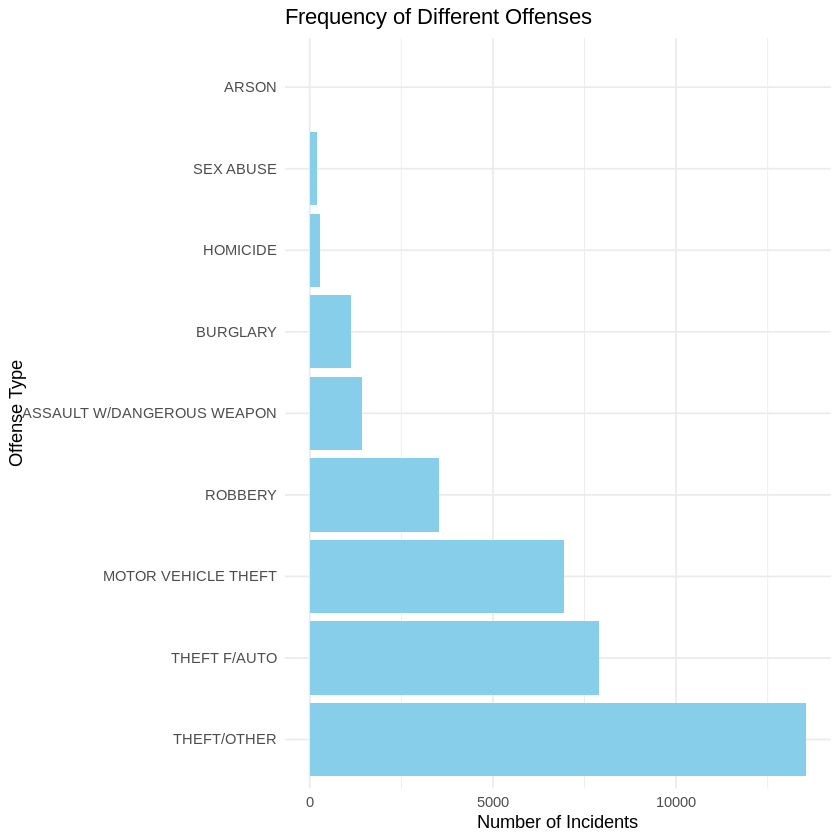

In [2]:
# Load necessary libraries
library(ggplot2)

# Bar Chart - Frequency of different offenses
ggplot(crime_data, aes(x = reorder(offense, -table(offense)[offense]))) +
  geom_bar(fill = "skyblue") +
  coord_flip() +
  labs(title = "Frequency of Different Offenses", x = "Offense Type", y = "Number of Incidents") +
  theme_minimal()

**Observation of Bar Chart:** The most frequent offense is "Theft F/Auto," followed by "Motor Vehicle Theft" and "Robbery." This indicates a higher occurrence of property-related crimes in the dataset.

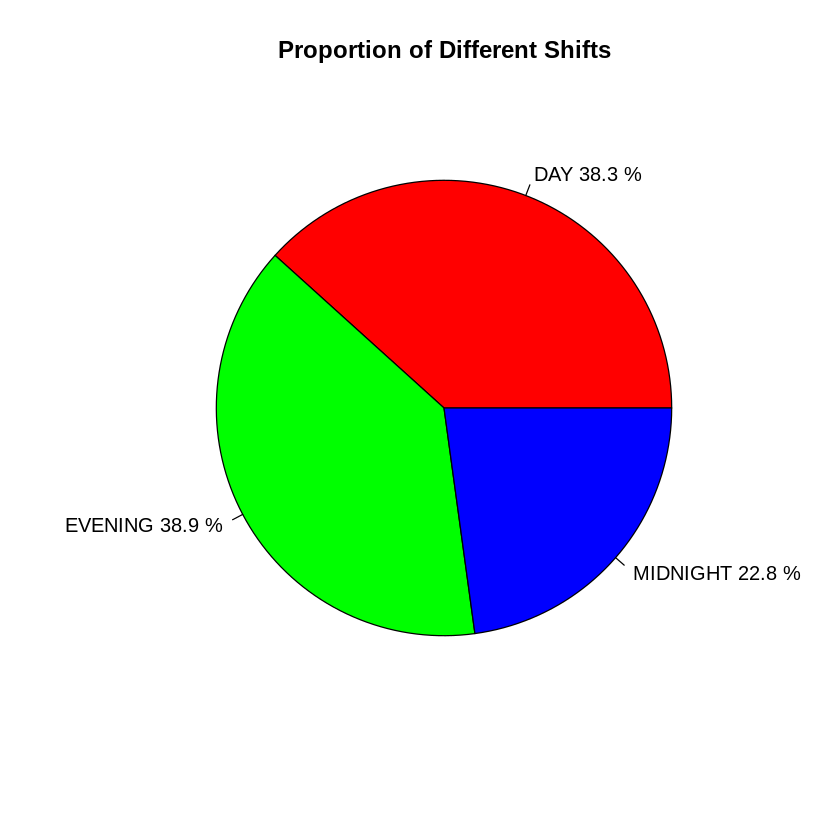

In [3]:
# Pie Chart - Proportion of different shifts
shift_counts <- table(crime_data$shift)
pie(shift_counts, labels = paste(names(shift_counts), round(shift_counts / sum(shift_counts) * 100, 1), "%"),
    main = "Proportion of Different Shifts", col = rainbow(length(shift_counts)))

**Observation of Pie Chart:** The "Evening" shift accounts for the largest proportion of reported crimes, followed by "Day" and "Midnight." This suggests that crimes are more likely to occur during the evening.

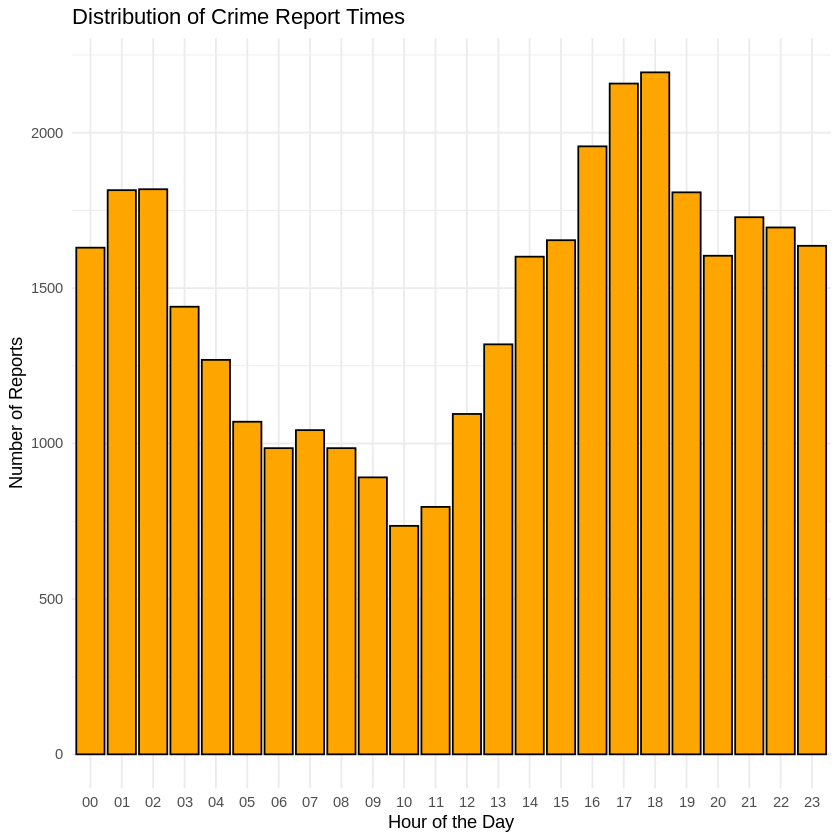

In [6]:
# Convert report_date to datetime
crime_data$report_date <- as.POSIXct(crime_data$report_date)

# Extract hour from report_date
crime_data$hour <- format(crime_data$report_date, "%H")

# Bar plot - Distribution of crime report times
ggplot(crime_data, aes(x = hour)) +
  geom_bar(fill = "orange", color = "black") +
  labs(title = "Distribution of Crime Report Times", x = "Hour of the Day", y = "Number of Reports") +
  theme_minimal()

**Observation of Histogram:** The histogram shows the distribution of crime reports, peaking during late night (00:00-03:00) and late afternoon to early evening (16:00-19:00). There is a significant drop in reports during the late morning hours (06:00-11:00). This pattern suggests that crime reporting is most frequent during these specific times of day, possibly reflecting variations in public activity or social behaviors.

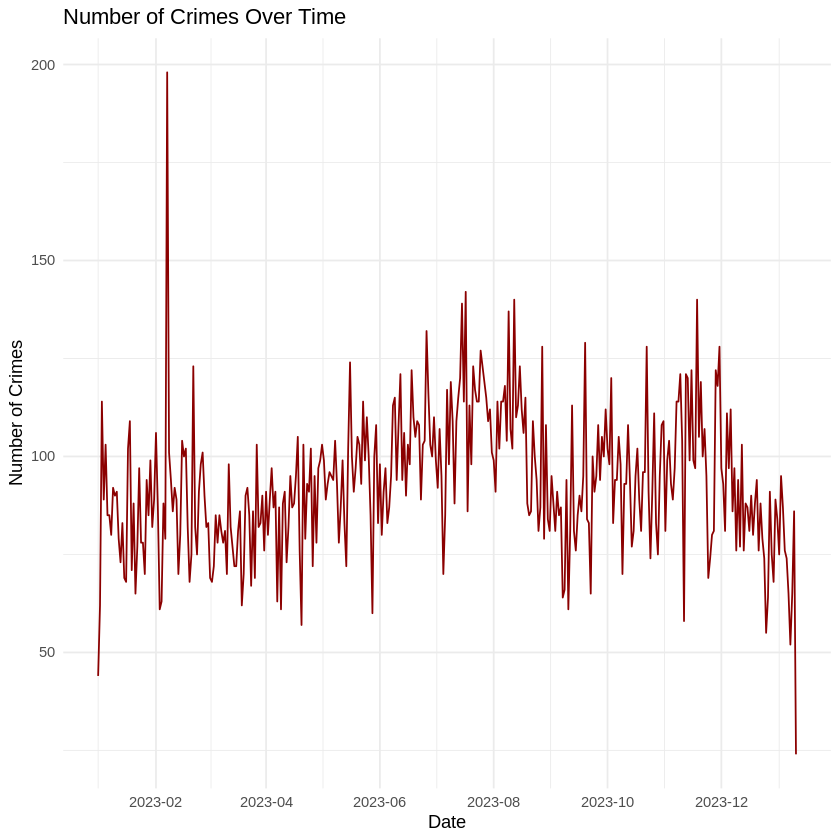

In [7]:
# Timeline Chart - Number of crimes over time
crime_data$report_date <- as.Date(crime_data$report_date)
crime_by_date <- aggregate(ccn ~ report_date, data = crime_data, FUN = length)

ggplot(crime_by_date, aes(x = report_date, y = ccn)) +
  geom_line(color = "darkred") +
  labs(title = "Number of Crimes Over Time", x = "Date", y = "Number of Crimes") +
  theme_minimal() +
  scale_x_date(date_labels = "%Y-%m", date_breaks = "2 months")

**Observation of Timeline Chart:** The timeline chart shows the number of crimes over time, with noticeable fluctuations throughout the year. There is a significant spike in early 2023, where the number of crimes sharply increased to nearly 200 incidents. After this peak, the crime numbers fluctuate between approximately 50 and 150 incidents, showing periodic rises and falls. Toward the end of the year, there is a general downward trend, with a decrease in crime numbers

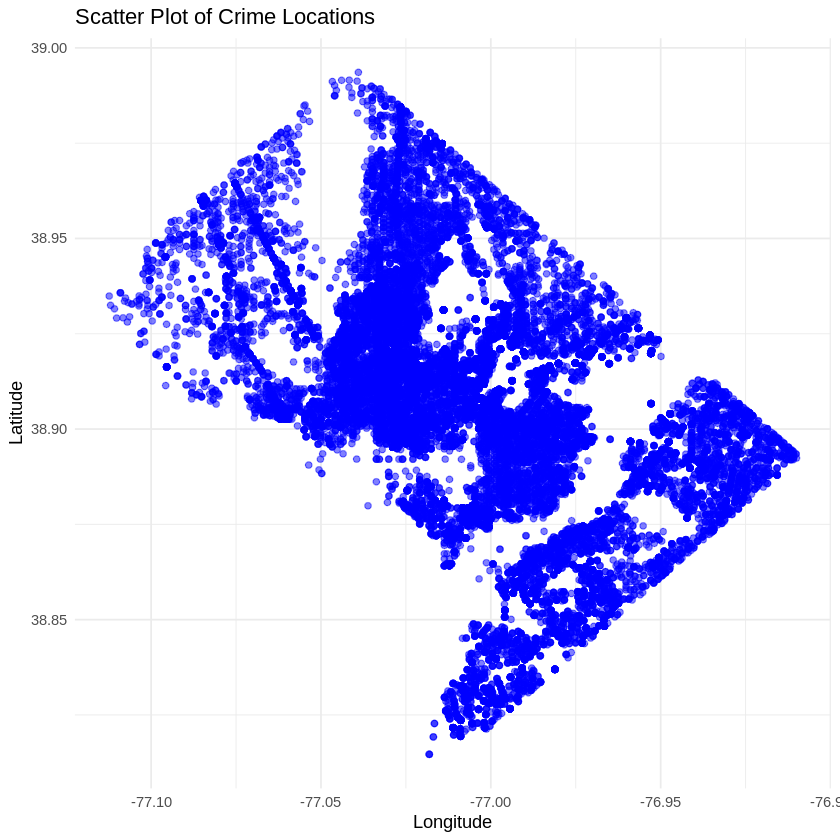

In [8]:
# Scatter Plot - Relationship between latitude and longitude
ggplot(crime_data, aes(x = longitude, y = latitude)) +
  geom_point(alpha = 0.5, color = "blue") +
  labs(title = "Scatter Plot of Crime Locations", x = "Longitude", y = "Latitude") +
  theme_minimal()

**Observation of Scatter plot:** The scatter plot shows that crimes are distributed across a wide geographic area, with some clustering in specific regions, potentially indicating high-crime areas.

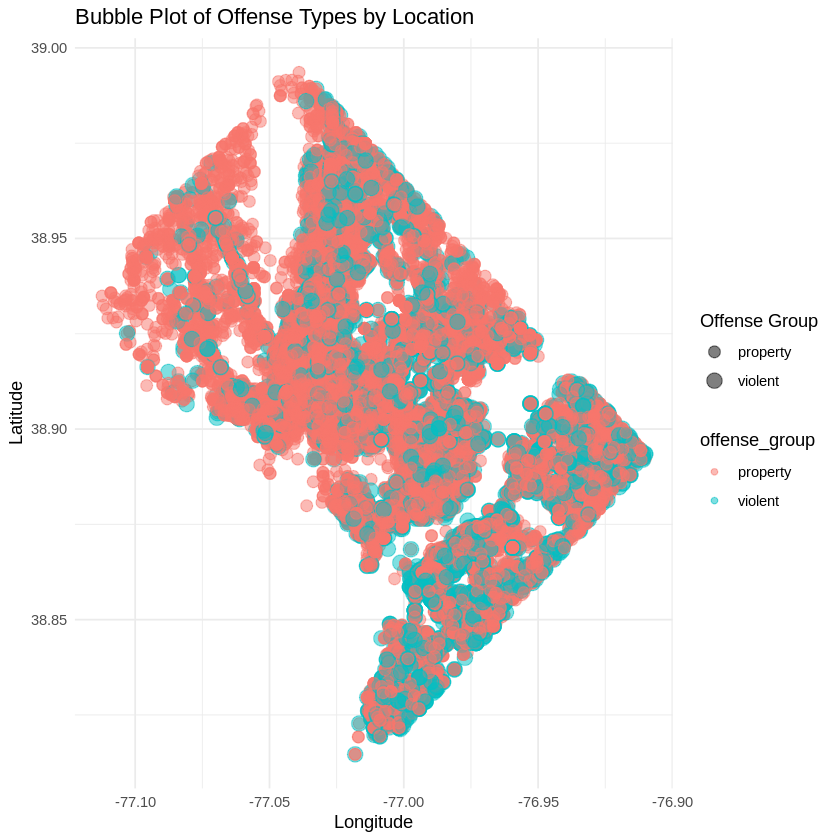

In [9]:
# Bubble Plot - Offense types with latitude and longitude
ggplot(crime_data, aes(x = longitude, y = latitude, size = as.factor(offense_group), color = offense_group)) +
  geom_point(alpha = 0.5) +
  labs(title = "Bubble Plot of Offense Types by Location", x = "Longitude", y = "Latitude") +
  theme_minimal() +
  scale_size_manual(values = c(3, 4)) +
  guides(size = guide_legend(title = "Offense Group"))

**Observation of Bubble plot:**The bubble plot shows the distribution of property and violent offenses by location, with significant overlap between the two types, indicating they often occur in the same areas. Offenses are densely clustered in certain regions, particularly towards the center, suggesting these areas have higher crime rates. The variation in bubble size reflects the frequency or severity of offenses, with larger bubbles indicating more incidents or greater severity.